  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.636e-05  4.000e-04  4.036e-03  4.040e-02
             4.040e-01  3.367e+00  4.829e+00]
        y: [[ 0.000e+00  1.083e-03 ...  9.058e+01  1.251e+02]
            [ 2.979e+01  2.979e+01 ...  2.457e+01  2.262e+01]
            [ 0.000e+00  9.090e-04 ...  2.374e+01  0.000e+00]
            [ 2.500e+01  2.500e+01 ... -9.630e+00 -2.262e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f4dc8104450>
 t_events: [array([ 4.829e+00]), array([ 2.360e+00])]
 y_events: [array([[ 1.251e+02,  2.262e+01,  0.000e+00, -2.262e+01]]), array([[ 6.520e+01,  2.585e+01,  2.863e+01,  0.000e+00]])]
     nfev: 44
     njev: 0
      nlu: 0
time to target = 4.83 s
time to highest point = 2.36 s
Range to target, xmax = 125.11 m
Max Height, ymax = 28.63 m


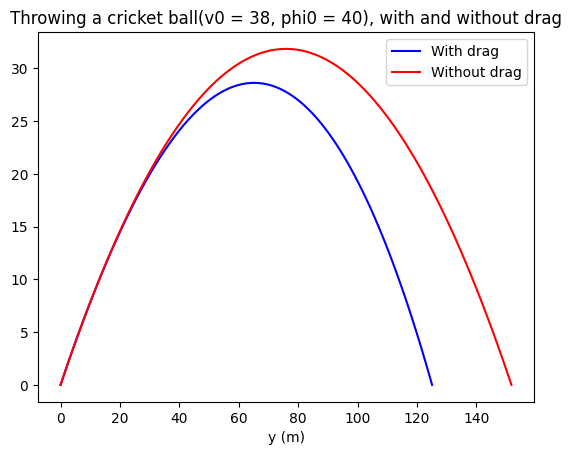

In [9]:
import numpy as np;
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

c = 0.2 # Usually 0.1 for high speeds, so I chose 0.2
r = 0.036 # average radius is between 3.5 cm and 3.63 cm
A = np.pi * r**2 # face area of the ball
m = .160 # mass is between 155 g and 163 g

# Constants
rho_air = 1.28
g = 9.81
k = .3 * c * rho_air * A

# Initial Speed and launch angle
v0 = 38.89 # 140 kmph
phi0 = np.radians(40) # Angle usually varies between 35 and 60 degrees for a lob

def deriv(t, u):
    x, xdot, y, ydot = u
    speed = np.hypot(xdot, ydot)
    xdotdot = -k/m * speed * xdot
    ydotdot = -k/m * speed * ydot - g
    return xdot, xdotdot, ydot, ydotdot


#Initial conditions
u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)
#Integreat this many times
t0, tf = 0, 50

def hit_target(t,u):
    return u[2]

hit_target.terminal = True
hit_target.direction = -1

def max_height(t,u):
    return u[3]

soln = solve_ivp(deriv, (t0, tf), u0, dense_output = True, events = (hit_target, max_height))

t = ((2 * v0) * np.sin(phi0))/g
t1 = np.linspace(0,t,num=100)

xnd = ((v0*t1)*np.cos(phi0))
ynd = ((v0*t1)*np.sin(phi0)) - ((0.5*g)*(t1**2))

print(soln)
print("time to target = {:.2f} s".format(soln.t_events[0][0]))
print("time to highest point = {:.2f} s".format(soln.t_events[1][0]))

t = np.linspace(0, soln.t_events[0][0], 100)

sol = soln.sol(t)
x,y = sol[0], sol[2]
print("Range to target, xmax = {:.2f} m".format(x[-1]))
print("Max Height, ymax = {:.2f} m".format(max(y)))

plt.title("Throwing a cricket ball(v0 = 38, phi0 = 40), with and without drag")
plt.plot(x,y,'blue', label='With drag')
plt.plot(xnd,ynd, 'red', label='Without drag')
plt.xlabel('x (m)')
plt.xlabel('y (m)')
plt.legend()
plt.show()

In [2]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
